# IMPORT LIBRARY

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import BatchNormalization

# IMPORT DATASET DAN DATA SPLITTING

In [15]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.load("kmnist",split=["train[:70%]", "train[:30%]"],
                                                       batch_size=-1, as_supervised=True,)

# SHAPE X_TRAIN

In [5]:
x_train_raw.shape

TensorShape([42000, 28, 28, 1])

# SHAPE X_TEST

In [6]:
x_test_raw.shape

TensorShape([18000, 28, 28, 1])

# MENGHITUNG DIMENSI

In [17]:
dimensi = x_train_raw.shape[1] * x_train_raw.shape[2] * x_train_raw.shape[3]
print(dimensi)

784


# RESHAPE GAMBAR

In [8]:
training = tf.image.resize(x_train_raw, (28, 28))
testing = tf.image.resize(x_test_raw, (28, 28))

training = np.reshape(training.numpy(), (42000, 784))
testing = np.reshape(testing.numpy(), (18000, 784))

# ENCODING LABEL

In [20]:
y_train = keras.utils.to_categorical(y_train_raw, 10)
y_test = keras.utils.to_categorical(y_test_raw, 10)

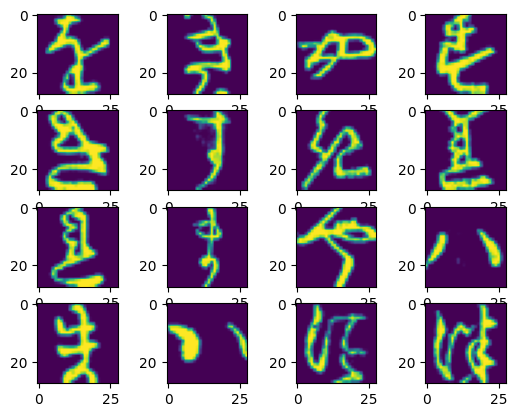

In [21]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_raw[i])
plt.show()

# BUAT MODEL DAN SUMMARY

In [10]:
model = Sequential(
    [
        Dense(512, activation='relu', input_dim = 784 ),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(32,  activation='softmax'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
Total params: 570,272
Trainable params: 570,272
Non-trainable params: 0
_________________________________________________________________


# COMPILE MODEL

In [11]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
hist = model.fit(training, y_train_raw, batch_size=32, epochs=5)

Epoch 1/5
1313/1313 [==============================] - 19s 14ms/step - loss: 1.9552 - accuracy: 0.7804
Epoch 2/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.5633 - accuracy: 0.8786
Epoch 3/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.4809 - accuracy: 0.8997
Epoch 4/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.4675 - accuracy: 0.9091
Epoch 5/5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.4795 - accuracy: 0.9075


# EVALUASI MODEL

In [13]:
score = model.evaluate(testing, y_test_raw)
print("TEST LOSS     : ", score[0])
print("TEST ACCURACY : ", score[1])

563/563 [==============================] - 2s 4ms/step - loss: 0.5201 - accuracy: 0.8728
TEST LOSS     :  0.5200670957565308
TEST ACCURACY :  0.8728333115577698
